# Mine domain 2. Extract subgroups with high concentration of PHAs

In [1]:
import pickle
from copy import copy, deepcopy
import numpy as np
import pandas as pd
from sklearn import neighbors, svm
import matplotlib as mpl

# Import Asterion modules
import read_database as rdb
import learn_data as ld
import asterion_learn as al
import visualize_data as vd

# Plotting settings for the current notebook
%matplotlib inline
# %matplotlib auto
# font = {'size': 25}
font = {'size': 14}
mpl.rc('font', **font)

** Load NEAs from the 2-nd domain **

In [2]:
dirpath = './asteroid_data/'
real_datasets = ['haz_real', 'nohaz_real']
gen_datasets = ['haz_gen', 'nohaz_gen']
genu_datasets = ['haz_gen', 'nohaz_gen']
name_sufixes = ['_dom2.p', '_dom2_rest.p']

In [3]:
dumps_real = [dirpath + ds + ns for ns in name_sufixes for ds in real_datasets]
dumps_gen = [dirpath + ds + ns for ns in name_sufixes for ds in gen_datasets]
dumps_genu = [dirpath + ds + ns for ns in name_sufixes for ds in genu_datasets]

haz_real, nohaz_real, haz_real_rest, nohaz_real_rest = map(rdb.loadObject, dumps_real)
haz_gen, nohaz_gen, haz_gen_rest, nohaz_gen_rest = map(rdb.loadObject, dumps_gen)
haz_genu, nohaz_genu, haz_genu_rest, nohaz_genu_rest = map(rdb.loadObject, dumps_genu)

In [4]:
gen_num = sum(map(len, [haz_gen, nohaz_gen]))
real_num = sum(map(len, [haz_real, nohaz_real]))

print "Number of virtual asteroids in the domain:", gen_num
print "Number of real asteroids in the domain:", real_num

Number of virtual asteroids in the domain: 67081
Number of real asteroids in the domain: 3099


** Investigate distributions of asteroids' orbital parameters in the 2-nd domain **

In [5]:
# vd.plot_alldistcombs(haz_gen, nohaz_gen, labels=True)

---
## Atiras & Atens

In [6]:
haz_gen_extracted_aa = []
nohaz_gen_trapped_aa = []

haz_real_extracted_aa = []
nohaz_real_trapped_aa = []

** Atiras **

In [7]:
haz_gen_atiras, haz_gen_atiras_num = rdb.get_atiras(haz_gen)
nohaz_gen_atiras, nohaz_gen_atiras_num = rdb.get_atiras(nohaz_gen)
atiras_gen_num = haz_gen_atiras_num + nohaz_gen_atiras_num

haz_real_atiras, haz_real_atiras_num = rdb.get_atiras(haz_real)
nohaz_real_atiras, nohaz_real_atiras_num = rdb.get_atiras(nohaz_real)
atiras_real_num = haz_real_atiras_num + nohaz_real_atiras_num

print "Number of virtual Atiras:", atiras_gen_num
print "Number of real Atiras:", atiras_real_num

Number of virtual Atiras: 1574
Number of real Atiras: 15


** Atens **

In [8]:
haz_gen_atens, haz_gen_atens_num = rdb.get_atens(haz_gen)
nohaz_gen_atens, nohaz_gen_atens_num = rdb.get_atens(nohaz_gen)
atens_gen_num = haz_gen_atens_num + nohaz_gen_atens_num

haz_real_atens, haz_real_atens_num = rdb.get_atens(haz_real)
nohaz_real_atens, nohaz_real_atens_num = rdb.get_atens(nohaz_real)
atens_real_num = haz_real_atens_num + nohaz_real_atens_num

print "Number of virtual Atens:", atens_gen_num
print "Number of real Atens:", atens_real_num

Number of virtual Atens: 4384
Number of real Atens: 911


** Atiras + Atens **

In [9]:
haz_gen_atiras_atens = pd.concat((haz_gen_atiras, haz_gen_atens))
nohaz_gen_atiras_atens = pd.concat((nohaz_gen_atiras, nohaz_gen_atens))

haz_gen_atiras_atens_num = len(haz_gen_atiras_atens)
nohaz_gen_atiras_atens_num = len(nohaz_gen_atiras_atens)
atiras_atens_gen_num = haz_gen_atiras_atens_num + nohaz_gen_atiras_atens_num

haz_real_atiras_atens = pd.concat((haz_real_atiras, haz_real_atens))
nohaz_real_atiras_atens = pd.concat((nohaz_real_atiras, nohaz_real_atens))

haz_real_atiras_atens_num = len(haz_real_atiras_atens)
nohaz_real_atiras_atens_num = len(nohaz_real_atiras_atens)
atiras_atens_real_num = haz_real_atiras_atens_num + nohaz_real_atiras_atens_num

In [10]:
print "Number of virtual PHAs in the group:", haz_gen_atiras_atens_num
print "Number of virtual NHAs in the group:", nohaz_gen_atiras_atens_num
print "Number of virtual Atiras and Atens:", atiras_atens_gen_num
print "Virtual Atiras and Atens group weight:", float(atiras_atens_gen_num)/gen_num

Number of virtual PHAs in the group: 2903
Number of virtual NHAs in the group: 3055
Number of virtual Atiras and Atens: 5958
Virtual Atiras and Atens group weight: 0.0888179961539


In [11]:
print "Number of real PHAs in the group:", haz_real_atiras_atens_num
print "Number of real NHAs in the group:", nohaz_real_atiras_atens_num
print "Number of real Atiras and Atens:", atiras_atens_real_num
print "Real Atiras and Atens group weight:", float(atiras_atens_real_num)/real_num

Number of real PHAs in the group: 597
Number of real NHAs in the group: 329
Number of real Atiras and Atens: 926
Real Atiras and Atens group weight: 0.298806066473


### Cut off non-hazardous piece in the a-q plane

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


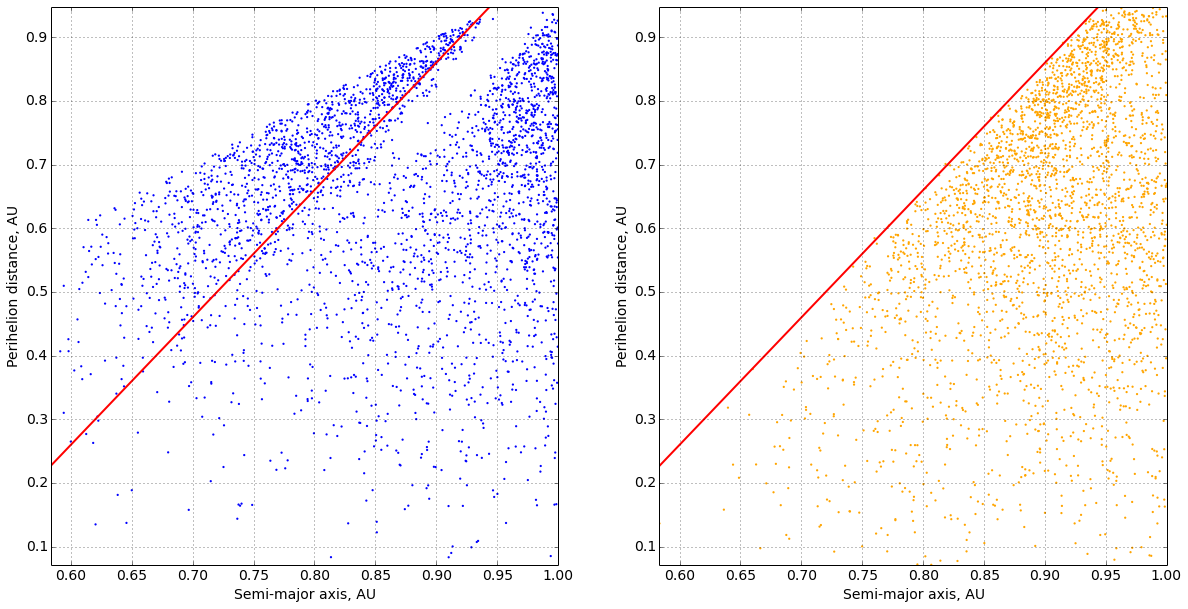

In [12]:
cutcol = ['a', 'q']
p1, p2 = [[0.545, 0.15], [0.945, 0.95]]
vd.plot_distributions2d(cutcol, haz_gen_atiras_atens, nohaz_gen_atiras_atens, line=[p1, p2], labels=True)

In [13]:
splitres = ld.split_by_line(haz_gen_atiras_atens, nohaz_gen_atiras_atens, [p1, p2], cutcol)

haz_gen_atiras_atens_qa, nohaz_gen_atiras_atens_qa = splitres[0]
haz_gen_atiras_atens_qa__, nohaz_gen_atiras_atens_qa__ = splitres[1]

PHA purity of the left subset: 0.603624244949
PHA purity of the right subset: 0.00432152117545


In [14]:
splitres = ld.split_by_line(haz_real_atiras_atens, nohaz_real_atiras_atens, [p1, p2], cutcol)

haz_real_atiras_atens_qa, nohaz_real_atiras_atens_qa = splitres[0]
haz_real_atiras_atens_qa__, nohaz_real_atiras_atens_qa__ = splitres[1]

PHA purity of the left subset: 0.648913043478
PHA purity of the right subset: 0.0


### Extract PHA region in the  *w*-*a*-*i* space

** Amplify datasets by their symetric copies over the *w* parameter **

In [15]:
haz_gen_atiras_atens_qa_se = ld.add_doublemirror_column(haz_gen_atiras_atens_qa, 'w', 180.0)
nohaz_gen_atiras_atens_qa_se = ld.add_doublemirror_column(nohaz_gen_atiras_atens_qa, 'w', 180.0)

** Cut *w*, *a* and *i* columns and nomalize datasets **

In [16]:
cutcol = ['w', 'a', 'i']
pairs, atiras_atens_wai_sc = ld.cut_normalize(cutcol, [haz_gen_atiras_atens_qa, nohaz_gen_atiras_atens_qa], 
                                                      [haz_real_atiras_atens_qa, nohaz_real_atiras_atens_qa],
                                                      [haz_gen_atiras_atens_qa_se, nohaz_gen_atiras_atens_qa_se])
haz_gen_cut, nohaz_gen_cut = pairs[0]
haz_real_cut, nohaz_real_cut = pairs[1]
haz_gen_se_cut, nohaz_gen_se_cut = pairs[2]

** Find decision surface with SVM **

In [17]:
clf_atiras_atens_wai = svm.SVC(gamma=80.0, C=0.1, class_weight={0: 1.5})
xtrain, ytrain = ld.mix_up(haz_gen_se_cut, nohaz_gen_se_cut)
clf_atiras_atens_wai = clf_atiras_atens_wai.fit(xtrain, ytrain)

In [18]:
# cutcol = ['w', 'a', 'i']
# clf_aa_wai = svm.SVC(gamma=80.0, C=0.1, class_weight={0: 1.5}) #class_weight={0: 1.5} 
# #(20 0.5), (30 0.1) (200 0.1)
# splitres = al.split_by_clf(clf_aa_wai, cutcol, haz_gen_atiras_atens_qa_se,
#                                                nohaz_gen_atiras_atens_qa_se,
#                                                haz_gen_atiras_atens_qa,
#                                                nohaz_gen_atiras_atens_qa)

# haz_gen_atiras_atens_wqa, nohaz_gen_atiras_atens_wqa = splitres[0]
# haz_gen_atiras_atens_wqa__, nohaz_gen_atiras_atens_wqa__ = splitres[1]
# aa_wai_sc = splitres[2]

** Estimate split quality for virtual Atiras & Atens **

In [19]:
predicted_gen = al.clf_split_quality(clf_atiras_atens_wai, haz_gen_cut, nohaz_gen_cut)

haz_gen_atiras_atens_wqa = haz_gen_atiras_atens_qa.iloc[predicted_gen[0]]
nohaz_gen_atiras_atens_wqa = nohaz_gen_atiras_atens_qa.iloc[predicted_gen[1]]

haz_gen_atiras_atens_wqa__ = haz_gen_atiras_atens_qa.iloc[predicted_gen[2]]
nohaz_gen_atiras_atens_wqa__ = nohaz_gen_atiras_atens_qa.iloc[predicted_gen[3]]

purity of PHA region: 0.893493576461
number of PHAs in the PHA region: 2156
number of NHAs in the PHA region: 257

purity of NHA region: 0.689279731993
number of PHAs in the NHA region: 742
number of NHAs in the NHA region: 1646

fraction of correctly classified PHAs: 0.743961352657


** Estimate split quality for real Atiras & Atens **

In [20]:
predicted_real = al.clf_split_quality(clf_atiras_atens_wai, haz_real_cut, nohaz_real_cut)

haz_real_atiras_atens_wqa = haz_real_atiras_atens_qa.iloc[predicted_real[0]]
nohaz_real_atiras_atens_wqa = nohaz_real_atiras_atens_qa.iloc[predicted_real[1]]

haz_real_atiras_atens_wqa__ = haz_real_atiras_atens_qa.iloc[predicted_real[2]]
nohaz_real_atiras_atens_wqa__ = nohaz_real_atiras_atens_qa.iloc[predicted_real[3]]

purity of PHA region: 0.93501048218
number of PHAs in the PHA region: 446
number of NHAs in the PHA region: 31

purity of NHA region: 0.65914221219
number of PHAs in the NHA region: 151
number of NHAs in the NHA region: 292

fraction of correctly classified PHAs: 0.747068676717


** Plot decision surface **

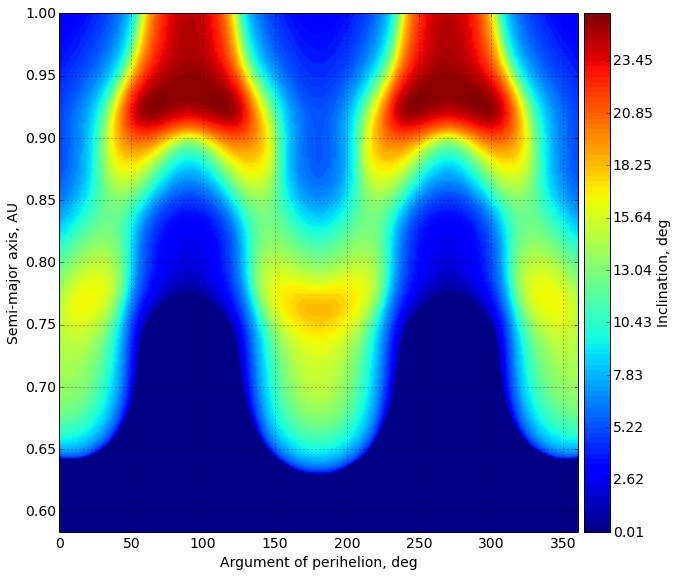

In [21]:
vd.plot_clf3d(clf_atiras_atens_wai, cutcol, num=250, labels=True, figsize=(9,8), 
              mode='2d', scales=atiras_atens_wai_sc) 

In [22]:
haz_gen_extracted_aa.append(haz_gen_atiras_atens_wqa)
nohaz_gen_trapped_aa.append(nohaz_gen_atiras_atens_wqa)

haz_real_extracted_aa.append(haz_real_atiras_atens_wqa)
nohaz_real_trapped_aa.append(nohaz_real_atiras_atens_wqa)

### Analyze rest of Atiras & Atens

In [23]:
# vd.display_allparams([haz_gen_atiras_atens_wqa__, nohaz_gen_atiras_atens_wqa__], vd.combs, vd.colnames)

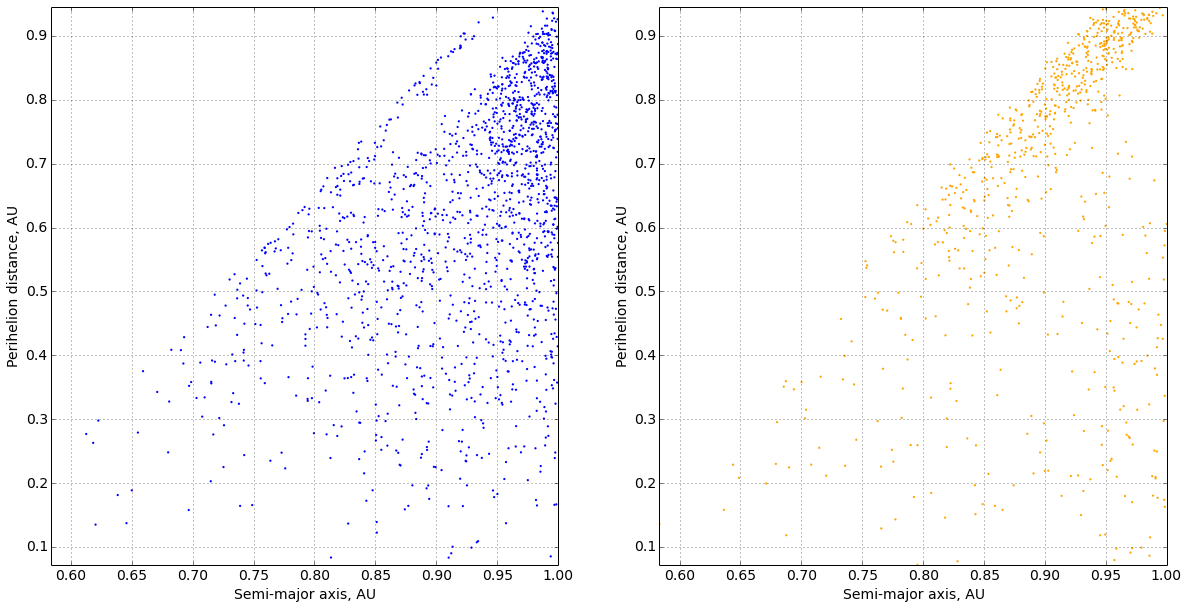

In [24]:
cutcol = ['a', 'q']
vd.plot_distributions2d(cutcol, haz_gen_atiras_atens_wqa__, nohaz_gen_atiras_atens_wqa__, labels=True)

### Extract PHA strap

** Select asteroids with high values of perihelion distance **

In [25]:
hg_gaa_wqa__, nhg_gaa_wqa__ = haz_gen_atiras_atens_wqa__, nohaz_gen_atiras_atens_wqa__
hg_raa_wqa__, nhg_raa_wqa__ = haz_real_atiras_atens_wqa__, nohaz_real_atiras_atens_wqa__

haz_gen_aa_wqa__bq = hg_gaa_wqa__[hg_gaa_wqa__.q > 0.5]
nohaz_gen_aa_wqa__bq = nhg_gaa_wqa__[nhg_gaa_wqa__.q > 0.5]
haz_real_aa_wqa__bq = hg_raa_wqa__[hg_raa_wqa__.q > 0.5]
nohaz_real_aa_wqa__bq = nhg_raa_wqa__[nhg_raa_wqa__.q > 0.5]

haz_gen_aa_wqa__sq = hg_gaa_wqa__[hg_gaa_wqa__.q <= 0.5]
nohaz_gen_aa_wqa__sq = nhg_gaa_wqa__[nhg_gaa_wqa__.q <= 0.5]
haz_real_aa_wqa__sq = hg_raa_wqa__[hg_raa_wqa__.q <= 0.5]
nohaz_real_aa_wqa__sq = nhg_raa_wqa__[nhg_raa_wqa__.q <= 0.5]

# print len(haz_gen_aa_wqa__sq)

** Cut *a* and *q* columns and nomalize datasets**

In [26]:
pairs, atiras_atens_aq_sc = ld.cut_normalize(cutcol, [haz_gen_aa_wqa__bq, nohaz_gen_aa_wqa__bq], 
                                                      [haz_real_aa_wqa__bq, nohaz_real_aa_wqa__bq])
haz_gen_cut, nohaz_gen_cut = pairs[0]
haz_real_cut, nohaz_real_cut = pairs[1]

** Train SVM **

In [27]:
clf_atiras_atens_aq = svm.SVC(gamma=8.0, C=1000.0, class_weight={0: 1.5})
xtrain, ytrain = ld.mix_up(haz_gen_cut, nohaz_gen_cut)
clf_atiras_atens_aq = clf_atiras_atens_aq.fit(xtrain, ytrain)

In [28]:
# cutcol = ['a', 'q']
# clf_aa_aq = svm.SVC(gamma=8.0, C=1000.0, class_weight={0: 1.5}) #class_weight={0: 1.5} 
# #(20 0.5), (30 0.1) (200 0.1)
# splitres = al.split_by_clf(clf_aa_aq, cutcol, haz_gen_aa_wqa__bq,
#                                                 nohaz_gen_aa_wqa__bq)

# haz_gen_aa_aq, nohaz_gen_aa_aq = splitres[0]
# haz_gen_aa_aq__, nohaz_gen_aa_aq__ = splitres[1]
# aa_aq_sc = splitres[2]

** Estimate split quality for virtual Atiras & Atens **

In [29]:
predicted_gen = al.clf_split_quality(clf_atiras_atens_aq, haz_gen_cut, nohaz_gen_cut)

haz_gen_atiras_atens_aq = haz_gen_aa_wqa__bq.iloc[predicted_gen[0]]
nohaz_gen_atiras_atens_aq = nohaz_gen_aa_wqa__bq.iloc[predicted_gen[1]]

haz_gen_atiras_atens_aq__ = haz_gen_aa_wqa__bq.iloc[predicted_gen[2]]
nohaz_gen_atiras_atens_aq__ = nohaz_gen_aa_wqa__bq.iloc[predicted_gen[3]]

purity of PHA region: 0.904761904762
number of PHAs in the PHA region: 342
number of NHAs in the PHA region: 36

purity of NHA region: 0.842219020173
number of PHAs in the NHA region: 219
number of NHAs in the NHA region: 1169

fraction of correctly classified PHAs: 0.609625668449


** Estimate split quality for real Atiras & Atens **

In [30]:
predicted_real = al.clf_split_quality(clf_atiras_atens_aq, haz_real_cut, nohaz_real_cut)

haz_real_atiras_atens_aq = haz_real_aa_wqa__bq.iloc[predicted_real[0]]
nohaz_real_atiras_atens_aq = nohaz_real_aa_wqa__bq.iloc[predicted_real[1]]

haz_real_atiras_atens_aq__ = haz_real_aa_wqa__bq.iloc[predicted_real[2]]
nohaz_real_atiras_atens_aq__ = nohaz_real_aa_wqa__bq.iloc[predicted_real[3]]

purity of PHA region: 0.88
number of PHAs in the PHA region: 22
number of NHAs in the PHA region: 3

purity of NHA region: 0.73828125
number of PHAs in the NHA region: 67
number of NHAs in the NHA region: 189

fraction of correctly classified PHAs: 0.247191011236


** Plot decision surface **

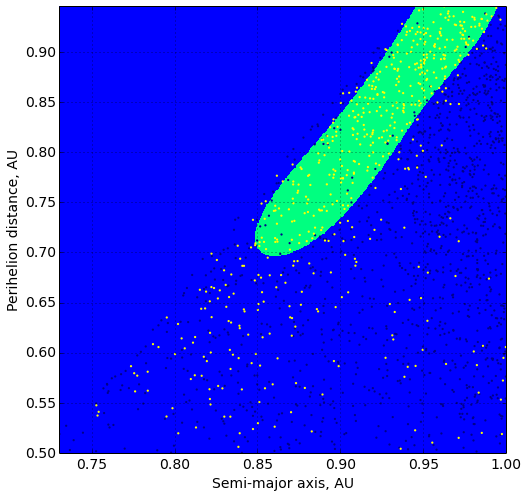

In [31]:
vd.plot_clf2d(clf_atiras_atens_aq, cutcol, num=400, figsize=(8, 8), scales=atiras_atens_aq_sc, 
                   labels=True, cmap='winter', haz_cut=haz_gen_cut, nohaz_cut=nohaz_gen_cut, gridlines=True)

In [32]:
haz_gen_extracted_aa.append(haz_gen_atiras_atens_aq)
nohaz_gen_trapped_aa.append(nohaz_gen_atiras_atens_aq)

haz_real_extracted_aa.append(haz_real_atiras_atens_aq)
nohaz_real_trapped_aa.append(nohaz_real_atiras_atens_aq)

### Atiras & Atens divisions qualitiy

** Divisions quality for virtual Atiras & Atens **

In [33]:
vd.print_summary(haz_gen_extracted_aa, nohaz_gen_trapped_aa, 
                 haz_gen_atiras_atens, nohaz_gen_atiras_atens, 'virtual')

Number of correctly classified virtual PHAs 2498
Number of trapped virtual NHAs: 293

Mass fraction of correctly classified virtual PHAs: 0.860489149156
Mass fraction of trapped virtual NHAs: 0.0959083469722

Cummulative purity of the outlined PHA regions: 0.895019706198


** Divisions quality for real Atiras & Atens **

In [34]:
vd.print_summary(haz_real_extracted_aa, nohaz_real_trapped_aa, 
                 haz_real_atiras_atens, nohaz_real_atiras_atens, 'real')

Number of correctly classified real PHAs 468
Number of trapped real NHAs: 34

Mass fraction of correctly classified real PHAs: 0.78391959799
Mass fraction of trapped real NHAs: 0.103343465046

Cummulative purity of the outlined PHA regions: 0.932270916335


---
## Apollos

In [35]:
haz_gen_extracted_ap = []
nohaz_gen_trapped_ap = []

haz_real_extracted_ap = []
nohaz_real_trapped_ap = []

In [36]:
haz_gen_apollo, haz_gen_apollo_num = rdb.get_apollos(haz_gen)
nohaz_gen_apollo, nohaz_gen_apollo_num = rdb.get_apollos(nohaz_gen)
apollo_gen_num = haz_gen_apollo_num + nohaz_gen_apollo_num

haz_real_apollo, haz_real_apollo_num = rdb.get_apollos(haz_real)
nohaz_real_apollo, nohaz_real_apollo_num = rdb.get_apollos(nohaz_real)
apollo_real_num = haz_real_apollo_num + nohaz_real_apollo_num

** Virtual Apollos **

In [37]:
print "Number of virtual PHAs in the group:", haz_gen_apollo_num
print "Number of virtual NHAs in the group:", nohaz_gen_apollo_num
print "Number of virtual Apollo:", apollo_gen_num
print "Apollo group weight:", float(apollo_gen_num)/gen_num

Number of virtual PHAs in the group: 20016
Number of virtual NHAs in the group: 41107
Number of virtual Apollo: 61123
Apollo group weight: 0.911182003846


** Real Apollos **

In [38]:
print "Number of real PHAs in the group:", haz_real_apollo_num
print "Number of real NHAs in the group:", nohaz_real_apollo_num
print "Number of real Apollo:", apollo_real_num
print "Apollo group weight:", float(apollo_real_num)/real_num

Number of real PHAs in the group: 658
Number of real NHAs in the group: 1515
Number of real Apollo: 2173
Apollo group weight: 0.701193933527


In [39]:
# vd.display_allparams([haz_gen_apollo, nohaz_gen_apollo], vd.combs, vd.colnames)

### Extract pure PHA region from the bottom of the *w*-*i* distribution

** Amplify datasets by it's symmetric copies over the *w* parameter **

In [40]:
haz_gen_apollo_se = ld.add_doublemirror_column(haz_gen_apollo, 'w', 180.0)
nohaz_gen_apollo_se = ld.add_doublemirror_column(nohaz_gen_apollo, 'w', 180.0)

In [41]:
# haz_gen_apollo_see = ld.extend_by_copies(haz_gen_apollo_se, 'w', extend_factor=0.25)
# nohaz_gen_apollo_see = ld.extend_by_copies(nohaz_gen_apollo_se, 'w', extend_factor=0.25)

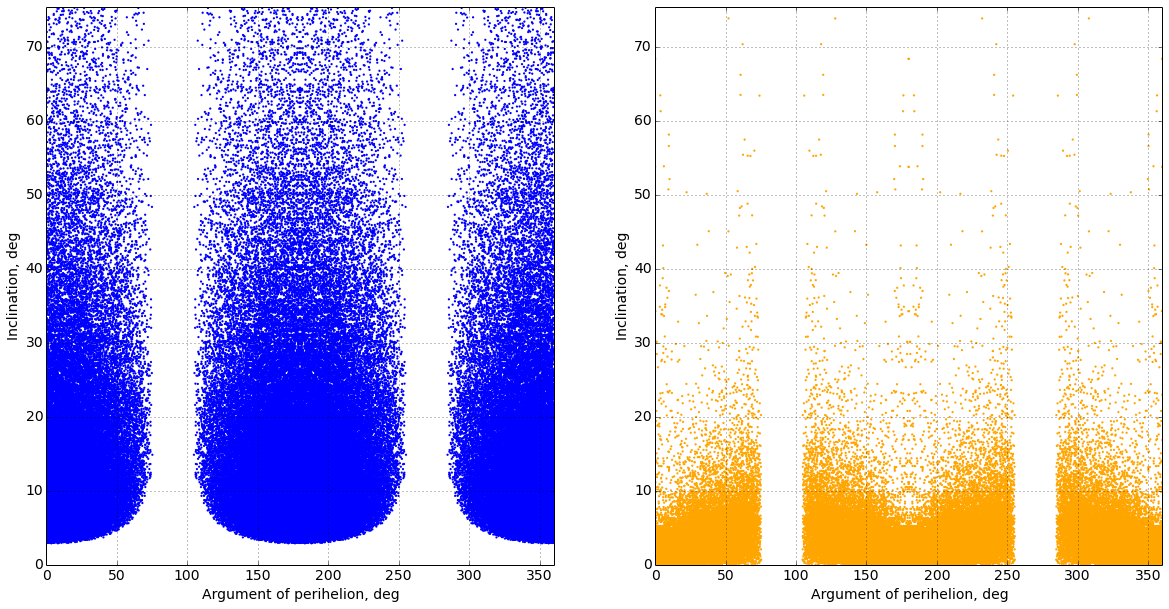

In [42]:
cutcol = ['w', 'i']
vd.plot_distributions2d(cutcol, haz_gen_apollo_se, nohaz_gen_apollo_se, labels=True)

** Cut *w* and *i* columns and nomalize datasets **

In [43]:
cutcol = ['w', 'i']
pairs, apollo_wi_sc = ld.cut_normalize(cutcol, [haz_gen_apollo, nohaz_gen_apollo], 
                                               [haz_real_apollo, nohaz_real_apollo],
                                               [haz_gen_apollo_se, nohaz_gen_apollo_se])
haz_gen_cut, nohaz_gen_cut = pairs[0]
haz_real_cut, nohaz_real_cut = pairs[1]
haz_gen_se_cut, nohaz_gen_se_cut = pairs[2]

** Train SVM **

In [44]:
clf_apollo_wi = svm.SVC(gamma=30., C=0.1, class_weight={0: 10})
xtrain, ytrain = ld.mix_up(haz_gen_se_cut, nohaz_gen_se_cut)
clf_apollo_wi = clf_apollo_wi.fit(xtrain, ytrain)

In [45]:
# clf_apollo_wi = svm.SVC(gamma=30., C=0.1, class_weight={0: 10})
# splitres = al.split_by_clf(clf_apollo_wi, cutcol, haz_gen_apollo_se, 
#                                                   nohaz_gen_apollo_se, 
#                                                   haz_gen_apollo, 
#                                                   nohaz_gen_apollo)

# haz_gen_apollo_wi, nohaz_gen_apollo_wi = splitres[0]
# haz_gen_apollo_wi__, nohaz_gen_apollo_wi__ = splitres[1]
# apollo_wi_sc = splitres[2]

** Estimate split quality for virtual Apollos **

In [46]:
predicted_gen = al.clf_split_quality(clf_apollo_wi, haz_gen_cut, nohaz_gen_cut)

haz_gen_apollo_wi = haz_gen_apollo.iloc[predicted_gen[0]]
nohaz_gen_apollo_wi = nohaz_gen_apollo.iloc[predicted_gen[1]]

haz_gen_apollo_wi__ = haz_gen_apollo.iloc[predicted_gen[2]]
nohaz_gen_apollo_wi__ = nohaz_gen_apollo.iloc[predicted_gen[3]]

purity of PHA region: 0.999908349372
number of PHAs in the PHA region: 10910
number of NHAs in the PHA region: 1

purity of NHA region: 0.818648928543
number of PHAs in the NHA region: 9106
number of NHAs in the NHA region: 41106

fraction of correctly classified PHAs: 0.545063948841


** Estimate split quality for real Apollos **

In [47]:
predicted_real = al.clf_split_quality(clf_apollo_wi, haz_real_cut, nohaz_real_cut)

haz_real_apollo_wi = haz_real_apollo.iloc[predicted_real[0]]
nohaz_real_apollo_wi = nohaz_real_apollo.iloc[predicted_real[1]]

haz_real_apollo_wi__ = haz_real_apollo.iloc[predicted_real[2]]
nohaz_real_apollo_wi__ = nohaz_real_apollo.iloc[predicted_real[3]]

purity of PHA region: 1.0
number of PHAs in the PHA region: 350
number of NHAs in the PHA region: 0

purity of NHA region: 0.831047723533
number of PHAs in the NHA region: 308
number of NHAs in the NHA region: 1515

fraction of correctly classified PHAs: 0.531914893617


** Plot decision surface **

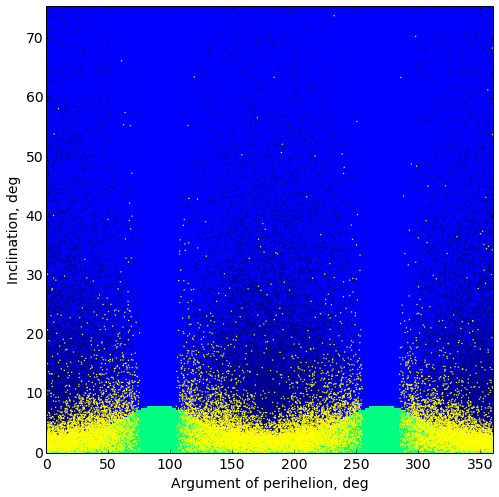

In [48]:
vd.plot_clf2d(clf_apollo_wi, cutcol, num=200, haz_cut=haz_gen_cut, nohaz_cut=nohaz_gen_cut,
                   scales=apollo_wi_sc, labels=True, cmap='winter', figsize=(8, 8), s=2)

In [49]:
haz_gen_extracted_ap.append(haz_gen_apollo_wi)
nohaz_gen_trapped_ap.append(nohaz_gen_apollo_wi)

haz_real_extracted_ap.append(haz_real_apollo_wi)
nohaz_real_trapped_ap.append(nohaz_real_apollo_wi)

### Analyze asteroids left after the *w*-*i* split

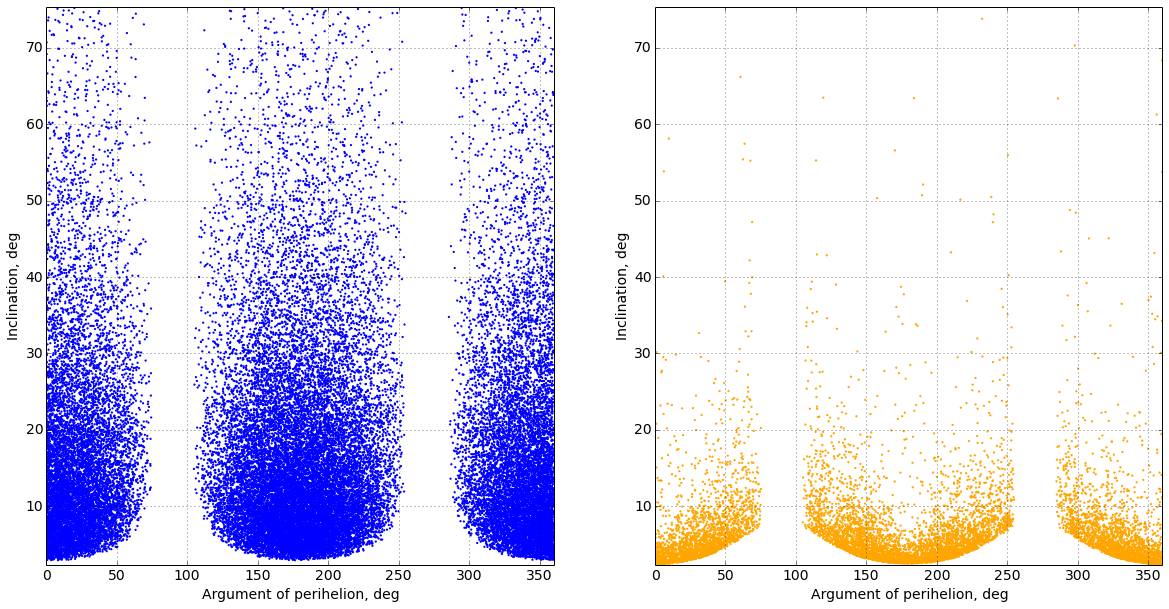

In [50]:
vd.plot_distributions2d(cutcol, haz_gen_apollo_wi__, nohaz_gen_apollo_wi__, labels=True)

** Amplify datasets by their symmetric copies over the 'w' parameter **

In [51]:
haz_gen_apollo_wi__se = ld.add_doublemirror_column(haz_gen_apollo_wi__, 'w', 180.0)
nohaz_gen_apollo_wi__se = ld.add_doublemirror_column(nohaz_gen_apollo_wi__, 'w', 180.0)

** Cut *w*, *q* and *i* columns and normalize datasets **

In [52]:
cutcol = ['w', 'q', 'i']
pairs, apollo_wqi_sc = ld.cut_normalize(cutcol, 
                                        [haz_gen_apollo_wi__, nohaz_gen_apollo_wi__], 
                                        [haz_real_apollo_wi__, nohaz_real_apollo_wi__],
                                        [haz_gen_apollo_wi__se, nohaz_gen_apollo_wi__se])

haz_gen_cut, nohaz_gen_cut = pairs[0]
haz_real_cut, nohaz_real_cut = pairs[1]
haz_gen_se_cut, nohaz_gen_se_cut = pairs[2]

** Prepare *w*-*q* domain mask to exclude out-of-domain points from the plot **

In [53]:
genu = pd.concat((haz_genu, nohaz_genu))
genu_rest = pd.concat((haz_genu_rest, nohaz_genu_rest))

apollo_wq_sc = apollo_wqi_sc[:2]

In [54]:
cutcol_ = ['w', 'q']
clfmask = svm.SVC(gamma=10.0, C=100.0, class_weight={1: 10})
clfmask = al.sgmask_clf2d_fit(clfmask, cutcol_, genu, genu_rest, apollo_wq_sc)

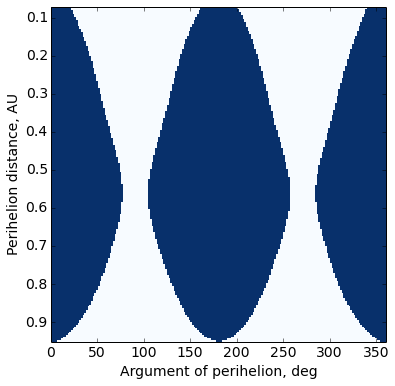

In [55]:
vd.plot_clf2d(clfmask, cutcol_, num=200, figsize=(6,6), scales=apollo_wq_sc, 
                   labels=True, cmap='Blues', invertaxes=[0, 1])

** Find decision surface in the *w*-*q*-*i* space **

In [56]:
cutcol = ['w', 'q', 'i']
clf_apollo_wqi = svm.SVC(gamma=100.0, C=2.0, class_weight={0: 1.5})
xtrain, ytrain = ld.mix_up(haz_gen_se_cut, nohaz_gen_se_cut)
clf_apollo_wqi = clf_apollo_wqi.fit(xtrain, ytrain)

In [57]:
# cutcol = ['w', 'q', 'i']
# clf_apollo_wqi = svm.SVC(gamma=100.0, C=2.0, class_weight={0: 1.5})
# #(20 0.5), (30 0.1) (30 1.0) (40 2) (50 2)!!!
# splitres = al.split_by_clf(clf_apollo_wqi, cutcol, haz_gen_apollo_wi__se,
#                                                    nohaz_gen_apollo_wi__se,
#                                                    haz_gen_apollo_wi__,
#                                                    nohaz_gen_apollo_wi__)

# haz_gen_apollo_wqi, nohaz_gen_apollo_wqi = splitres[0]
# haz_gen_apollo_wqi__, nohaz_gen_apollo_wqi__ = splitres[1]
# apollo_wqi_sc = splitres[2]

** Estimate split quality for virtual Apollos **

In [58]:
predicted_gen = al.clf_split_quality(clf_apollo_wqi, haz_gen_cut, nohaz_gen_cut)

haz_gen_apollo_wqi = haz_gen_apollo_wi__.iloc[predicted_gen[0]]
nohaz_gen_apollo_wqi = nohaz_gen_apollo_wi__.iloc[predicted_gen[1]]

haz_gen_apollo_wqi__ = haz_gen_apollo_wi__.iloc[predicted_gen[2]]
nohaz_gen_apollo_wqi__ = nohaz_gen_apollo_wi__.iloc[predicted_gen[3]]

purity of PHA region: 0.883118573474
number of PHAs in the PHA region: 6785
number of NHAs in the PHA region: 898

purity of NHA region: 0.945425474382
number of PHAs in the NHA region: 2321
number of NHAs in the NHA region: 40208

fraction of correctly classified PHAs: 0.745113112234


** Estimate split quality for real Apollos **

In [59]:
predicted_real = al.clf_split_quality(clf_apollo_wqi, haz_real_cut, nohaz_real_cut)

haz_real_apollo_wqi = haz_real_apollo_wi__.iloc[predicted_real[0]]
nohaz_real_apollo_wqi = nohaz_real_apollo_wi__.iloc[predicted_real[1]]

haz_real_apollo_wqi__ = haz_real_apollo_wi__.iloc[predicted_real[2]]
nohaz_real_apollo_wqi__ = nohaz_real_apollo_wi__.iloc[predicted_real[3]]

purity of PHA region: 0.889908256881
number of PHAs in the PHA region: 194
number of NHAs in the PHA region: 24

purity of NHA region: 0.928971962617
number of PHAs in the NHA region: 114
number of NHAs in the NHA region: 1491

fraction of correctly classified PHAs: 0.62987012987


** Plot decision boundary **

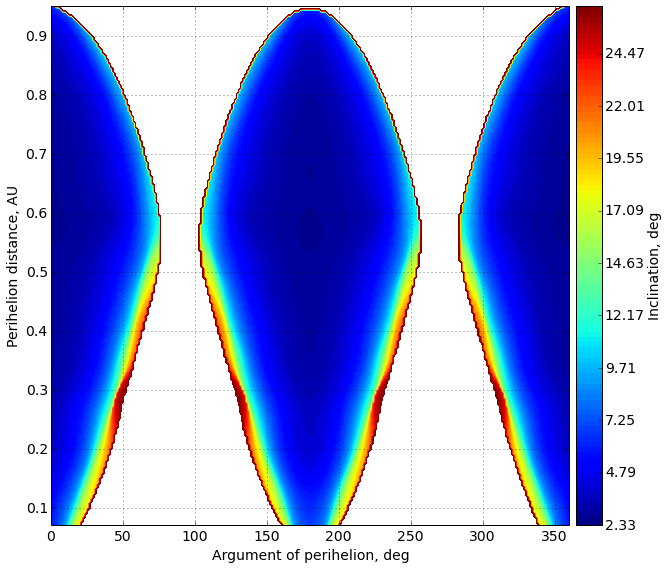

In [60]:
vd.plot_clf3d(clf_apollo_wqi, cutcol, num=250, labels=True, figsize=(9,8), mode='2d', 
              scales=apollo_wqi_sc, clf_masks=[(clfmask, 0)]) 

In [61]:
haz_gen_extracted_ap.append(haz_gen_apollo_wqi)
nohaz_gen_trapped_ap.append(nohaz_gen_apollo_wqi)

haz_real_extracted_ap.append(haz_real_apollo_wqi)
nohaz_real_trapped_ap.append(nohaz_real_apollo_wqi)

### Apollo divisions qualitiy

** Divisions quality for virtual Apollos **

In [62]:
vd.print_summary(haz_gen_extracted_ap, nohaz_gen_trapped_ap, haz_gen_apollo, nohaz_gen_apollo, 'virtual')

Number of correctly classified virtual PHAs 17695
Number of trapped virtual NHAs: 899

Mass fraction of correctly classified virtual PHAs: 0.884042765787
Mass fraction of trapped virtual NHAs: 0.021869754543

Cummulative purity of the outlined PHA regions: 0.951651070238


** Divisions quality for real Apollos **

In [63]:
vd.print_summary(haz_real_extracted_ap, nohaz_real_trapped_ap, haz_real_apollo, nohaz_real_apollo, 'real')

Number of correctly classified real PHAs 544
Number of trapped real NHAs: 24

Mass fraction of correctly classified real PHAs: 0.826747720365
Mass fraction of trapped real NHAs: 0.0158415841584

Cummulative purity of the outlined PHA regions: 0.957746478873


### Analyze the rest of Apollos

In [64]:
# vd.display_allparams([haz_gen_apollo_wqi__, nohaz_gen_apollo_wqi__], vd.combs, vd.colnames)

** Apply 4-dimensional split **

In [65]:
cutcol = ['w', 'q', 'i', 'a']
pairs, apollo_wqi__4d_sc = ld.cut_normalize(cutcol, 
                                            [haz_gen_apollo_wqi__, nohaz_gen_apollo_wqi__], 
                                            [haz_real_apollo_wqi__, nohaz_real_apollo_wqi__])

haz_gen_cut, nohaz_gen_cut = pairs[0]
haz_real_cut, nohaz_real_cut = pairs[1]

** Cut *w*, *q*, *i* and *a* columns and normalize datasets **

In [66]:
clf_apollo_4d = svm.SVC(gamma=80.0, C=10)
xtrain, ytrain = ld.mix_up(haz_gen_cut, nohaz_gen_cut)
clf_apollo_4d = clf_apollo_4d.fit(xtrain, ytrain)

In [67]:
# cutcol = ['w', 'q', 'i', 'a']
# clf_apollo_4d = svm.SVC(gamma=80.0, C=10) #class_weight={0: 1.5} 
# #(20 0.5), (30 0.1) (30 1.0)
# splitres = al.split_by_clf(clf_apollo_4d, cutcol,  haz_gen_apollo_wqi__,
#                                                    nohaz_gen_apollo_wqi__,
#                                                    haz_gen_apollo_wqi__,
#                                                    nohaz_gen_apollo_wqi__)

# haz_gen_apollo_wqi__4d, nohaz_gen_apollo_wqi__4d = splitres[0]
# haz_gen_apollo_wqi__4d__, haz_gen_apollo_wqi__4d__ = splitres[1]
# haz_gen_apollo_wqi__4d_sc = splitres[2]

** Estimate split quality for virtual Apollos **

In [68]:
predicted_gen = al.clf_split_quality(clf_apollo_4d, haz_gen_cut, nohaz_gen_cut)

haz_gen_apollo_wqia = haz_gen_apollo_wqi__.iloc[predicted_gen[0]]
nohaz_gen_apollo_wqia = nohaz_gen_apollo_wqi__.iloc[predicted_gen[1]]

haz_gen_apollo_wqia__ = haz_gen_apollo_wqi__.iloc[predicted_gen[2]]
nohaz_gen_apollo_wqia__ = nohaz_gen_apollo_wqi__.iloc[predicted_gen[3]]

purity of PHA region: 0.908285565399
number of PHAs in the PHA region: 1743
number of NHAs in the PHA region: 176

purity of NHA region: 0.98576705245
number of PHAs in the NHA region: 578
number of NHAs in the NHA region: 40032

fraction of correctly classified PHAs: 0.750969409737


** Estimate split quality for real Apollos **

In [69]:
predicted_real = al.clf_split_quality(clf_apollo_4d, haz_real_cut, nohaz_real_cut)

haz_real_apollo_wqia = haz_real_apollo_wqi__.iloc[predicted_real[0]]
nohaz_real_apollo_wqia = nohaz_real_apollo_wqi__.iloc[predicted_real[1]]

haz_real_apollo_wqia__ = haz_real_apollo_wqi__.iloc[predicted_real[2]]
nohaz_real_apollo_wqia__ = nohaz_real_apollo_wqi__.iloc[predicted_real[3]]

purity of PHA region: 0.81
number of PHAs in the PHA region: 81
number of NHAs in the PHA region: 19

purity of NHA region: 0.978073089701
number of PHAs in the NHA region: 33
number of NHAs in the NHA region: 1472

fraction of correctly classified PHAs: 0.710526315789


** Try applying low-dimensional splits for the rest of Apollos **

In [70]:
# print len(haz_gen_apollo_wqi__)

In [71]:
# vd.display_allparams([haz_gen_apollo_aq, nohaz_gen_apollo_aq], vd.combs, vd.colnames)

In [72]:
# cutcol = ['a', 'q']
# vd.display_param2d(cutcol, labels, [haz_gen_apollo_wqi__, nohaz_gen_apollo_wqi__])

In [73]:
# hg_wqi__, nhg_wqi__ = haz_gen_apollo_wqi__, nohaz_gen_apollo_wqi__

# hg_wqi__bq = hg_wqi__[hg_wqi__.q > 0.65]
# nhg_wqi__bq = nhg_wqi__[nhg_wqi__.q > 0.65]

In [74]:
# vd.display_allparams([hg_wqi__bq, nhg_wqi__bq], vd.combs, vd.colnames)

** Extract two regions with PHAs **

In [75]:
# haz_gen_apollo_qa_top = haz_gen_apollo_wqi__[haz_gen_apollo_wqi__.q > 0.65]
# nohaz_gen_apollo_qa_top = nohaz_gen_apollo_wqi__[nohaz_gen_apollo_wqi__.q > 0.65]

# haz_gen_apollo_qa_top = haz_gen_apollo_qa_top[haz_gen_apollo_qa_top.a > 1.5]
# nohaz_gen_apollo_qa_top = nohaz_gen_apollo_qa_top[nohaz_gen_apollo_qa_top.a > 1.5]

In [76]:
# haz_gen_apollo_qa_bottom = haz_gen_apollo_wqi__[haz_gen_apollo_wqi__.q < 0.7]
# nohaz_gen_apollo_qa_bottom = nohaz_gen_apollo_wqi__[nohaz_gen_apollo_wqi__.q < 0.7]

# haz_gen_apollo_qa_bottom = haz_gen_apollo_qa_bottom[haz_gen_apollo_qa_bottom.a < 1.8]
# nohaz_gen_apollo_qa_bottom = nohaz_gen_apollo_qa_bottom[nohaz_gen_apollo_qa_bottom.a < 1.8]

** Amplify datasets by it's symmetric copies over the 'w' parameter **

In [77]:
# haz_gen_apollo_qa_top_se = ld.add_doublemirror_column(haz_gen_apollo_qa_top, 'w', 180.0)
# nohaz_gen_apollo_qa_top_se = ld.add_doublemirror_column(nohaz_gen_apollo_qa_top, 'w', 180.0)

# haz_gen_apollo_qa_bottom_se = ld.add_doublemirror_column(haz_gen_apollo_qa_bottom, 'w', 180.0)
# nohaz_gen_apollo_qa_bottom_se = ld.add_doublemirror_column(nohaz_gen_apollo_qa_bottom, 'w', 180.0)

In [78]:
# cutcol = ['w', 'q', 'a']
# clf_apollo_qa_top = svm.SVC(gamma=80.0, C=10) #class_weight={0: 1.5} 
# #(20 0.5), (30 0.1) (30 1.0)
# splitres = al.split_by_clf(clf_apollo_qa_top, cutcol, haz_gen_apollo_qa_top_se,
#                                                       nohaz_gen_apollo_qa_top_se,
#                                                       haz_gen_apollo_qa_top,
#                                                       nohaz_gen_apollo_qa_top)

# haz_gen_apollo_top, nohaz_gen_apollo_top = splitres[0]
# haz_gen_apollo_top__, nohaz_gen_apollo_top__ = splitres[1]
# haz_gen_apollo_top_sc = splitres[2]

In [79]:
# cutcol = ['w', 'q', 'a']
# clf_apollo_qa_bottom = svm.SVC(gamma=20.0, C=1) #class_weight={0: 1.5} 
# #(20 0.5), (30 0.1) (30 1.0)
# splitres = al.split_by_clf(clf_apollo_qa_bottom, cutcol, haz_gen_apollo_qa_bottom_se,
#                                                          nohaz_gen_apollo_qa_bottom_se,
#                                                          haz_gen_apollo_qa_bottom,
#                                                          nohaz_gen_apollo_qa_bottom)

# haz_gen_apollo_bottom, nohaz_gen_apollo_bottom = splitres[0]
# haz_gen_apollo_bottom__, nohaz_gen_apollo_bottom__ = splitres[1]
# haz_gen_apollo_bottom_sc = splitres[2]

** Prepare 'w-q' domain mask to exclude out-of-domain points from the plot **

In [80]:
# haz_gen_apollo_se_bottom = haz_gen_apollo_se[haz_gen_apollo_se.q < 0.7]
# nohaz_gen_apollo_se_bottom = nohaz_gen_apollo_se[nohaz_gen_apollo_se.q < 0.7]

# haz_gen_apollo_se_bottom = haz_gen_apollo_se_bottom[haz_gen_apollo_se_bottom.a < 1.8]
# nohaz_gen_apollo_se_bottom = nohaz_gen_apollo_se_bottom[nohaz_gen_apollo_se_bottom.a < 1.8]

# cutcol = ['w', 'q']
# clfmask = svm.SVC(gamma=5.0, C=1000.0, class_weight={1: 10})
# clfmask = al.sgmask_clf(haz_gen_apollo_se_bottom, nohaz_gen_apollo_se_bottom, 
#                         haz_genu_rest, nohaz_genu_rest, clfmask, cutcol)

In [81]:
# labels = [vd.colnames[nm] for nm in cutcol]
# scales = ld.dfcommon_bounds([haz_gen_apollo_se_bottom, nohaz_gen_apollo_se_bottom], cutcol)
# vd.plot_classifier(plotgrid, clfmask, num=200, figsize=(6,6), scales=scales, 
#                    labels=labels, cmap='Blues', invertaxes=[0, 1])

In [82]:
# cutcol = ['w', 'q', 'a']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.plot_clf3d(clf_apollo_qa_bottom, num=100, labels=labels, figsize=(8,7), mode='2d', 
#               scales=haz_gen_apollo_bottom_sc, clf_masks=[(clfmask, 0)], invertaxes=[0, 1])

** Unfortunately low-dimensional split does not work for the rest of Apollos. **

## Any Amors?

In [83]:
haz_gen_amor, haz_gen_amor_num = rdb.get_amors(haz_gen)
nohaz_gen_amor, nohaz_gen_amor_num = rdb.get_amors(nohaz_gen)

print haz_gen_amor_num
print nohaz_gen_amor_num

0
0


## Count down cummulative split quality

** Virtual asteroids **

In [84]:
haz_gen_extracted = haz_gen_extracted_aa + haz_gen_extracted_ap
nohaz_gen_trapped = nohaz_gen_trapped_aa + nohaz_gen_trapped_ap

In [85]:
vd.print_summary(haz_gen_extracted, nohaz_gen_trapped, haz_gen, nohaz_gen, 'virtual')

Number of correctly classified virtual PHAs 20193
Number of trapped virtual NHAs: 1192

Mass fraction of correctly classified virtual PHAs: 0.881059383045
Mass fraction of trapped virtual NHAs: 0.0269915311807

Cummulative purity of the outlined PHA regions: 0.944259995324


** Real asteroids **

In [86]:
haz_real_extracted = haz_real_extracted_aa + haz_real_extracted_ap
nohaz_real_trapped = nohaz_real_trapped_aa + nohaz_real_trapped_ap

In [87]:
vd.print_summary(haz_real_extracted, nohaz_real_trapped, haz_real, nohaz_real, 'real')

Number of correctly classified real PHAs 1012
Number of trapped real NHAs: 58

Mass fraction of correctly classified real PHAs: 0.806374501992
Mass fraction of trapped real NHAs: 0.031453362256

Cummulative purity of the outlined PHA regions: 0.945794392523
